 Original Dataset Created (100x30)

 Number of NAs in each row:
0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

Number of NAs in each column:
C1     23
C2     22
C3     21
C4     18
C5     26
C6     28
C7     23
C8     27
C9     21
C10    17
C11    26
C12    24
C13    23
C14    28
C15    23
C16    34
C17    31
C18    31
C19    34
C20    20
C21    24
C22    26
C23    23
C24    31
C25    27
C26    26
C27    31
C28    27
C29    31
C30    31
dtype: int64

 Missing values replaced with column means


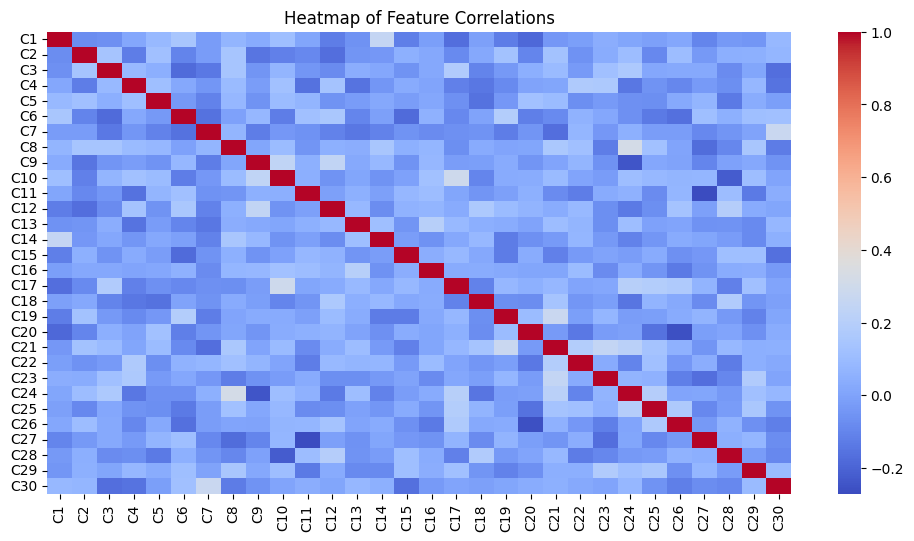


 Number of correlation pairs <= 0.7 : 840

 Dataset normalized between 0 and 10

 Values replaced with 0 (<=5) and 1 (>5)


C:\Users\KUNAL\AppData\Local\Temp\ipykernel_15840\1709947526.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)


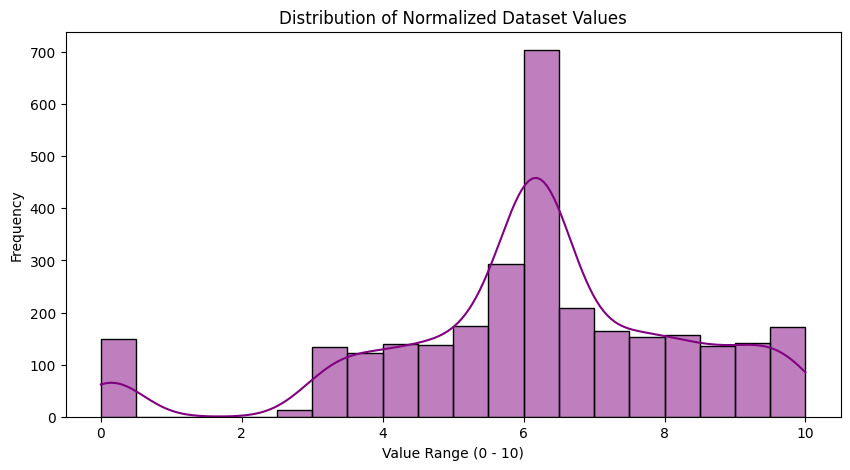

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f'C{i+1}' for i in range(30)])

print(" Original Dataset Created (100x30)")

df = df.mask((df >= 10) & (df <= 60))
print("\n Number of NAs in each row:")
print(df.isna().sum(axis=1))

print("\nNumber of NAs in each column:")
print(df.isna().sum())

df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
print("\n Missing values replaced with column means")

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Feature Correlations")
plt.show()

corr_matrix = df.corr().abs()
count_low_corr = (corr_matrix <= 0.7).sum().sum() - len(corr_matrix)  # remove self-correlation
print(f"\n Number of correlation pairs <= 0.7 : {count_low_corr}")

df_normalized = (df - df.min()) / (df.max() - df.min()) * 10
print("\n Dataset normalized between 0 and 10")

df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)
print("\n Values replaced with 0 (<=5) and 1 (>5)")

plt.figure(figsize=(10, 5))
sns.histplot(df_normalized.values.flatten(), bins=20, kde=True, color='purple')
plt.title("Distribution of Normalized Dataset Values")
plt.xlabel("Value Range (0 - 10)")
plt.ylabel("Frequency")
plt.show()
